In [1]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
X = pd.read_csv('./data/x.csv', index_col=0)
y_ds_un= pd.read_csv('./data/y_ds.csv', index_col=0)
X_gd = pd.read_csv('./data/x_gd_resampled.csv', index_col=0)
y_gd = pd.read_csv('./data/y_gd_resampled.csv', index_col=0)
X_ds = pd.read_csv('./data/x_ds_resampled.csv', index_col=0)
y_ds = pd.read_csv('./data/y_ds_resampled.csv', index_col=0)
X_ds2 = pd.read_csv('./data/x_ds+gd_edit_resampled.csv', index_col=0)
y_ds2 = pd.read_csv('./data/y_ds+gd_edit_resampled.csv', index_col=0)
X_gdds = pd.read_csv('./data/x_gdds_resampled.csv', index_col=0)
y_gdds = pd.read_csv('./data/y_gdds_resampled.csv', index_col=0)
X_gdds2 = pd.read_csv('./data/x_gdds2_edit_resampled.csv', index_col=0)
y_gdds2 = pd.read_csv('./data/y_gdds2_edit_resampled.csv', index_col=0)
X_gdds2

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Mitochondrial genetic inheritance disorders,Multifactorial genetic inheritance disorders,Single-gene inheritance diseases
0,-0.657008,0.829238,1.253709,-1.245714,-0.870854,0.057669,-0.853643,-0.883431,1.001617,1.110451,...,-0.777460,0.294673,0.766328,0.827148,0.857458,1.112873,-0.838278,1,0,0
1,-1.128463,0.829238,1.253709,0.802715,1.148245,0.142128,0.872107,0.872568,1.001617,-0.900493,...,-0.917501,-1.441246,0.766328,0.827148,-1.166184,-0.898533,1.192865,1,0,0
2,-0.892736,0.829238,-0.797596,0.802715,1.148245,1.132034,-0.853643,1.007645,-0.998339,-0.900493,...,-0.826711,1.162632,0.766328,-1.208916,0.857458,-0.898533,1.192865,1,0,0
3,-0.657008,0.829238,-0.797596,0.802715,1.148245,0.348136,0.770592,-1.086047,1.001617,-0.900493,...,-0.727300,-1.441246,0.766328,-1.208916,0.857458,-0.898533,1.192865,1,0,0
4,-0.185554,0.829238,-0.797596,0.802715,-0.870854,-0.650867,-0.447585,-1.018508,1.001617,1.110451,...,0.437789,0.294673,0.766328,-1.208916,-1.166184,1.112873,1.192865,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,0.993082,-1.205870,-0.797596,-1.245714,1.148245,-0.550928,-0.346070,-1.086047,-0.998339,1.110451,...,-0.502240,-1.441246,0.766328,-1.208916,0.857458,-0.898533,1.192865,0,0,1
17496,-0.421281,0.829238,-0.797596,-1.245714,-0.870854,-1.162969,0.872107,-0.545739,1.001617,-0.900493,...,-0.886718,-0.573287,0.766328,-1.208916,-1.166184,-0.898533,-0.838278,0,0,1
17497,0.285900,0.829238,1.253709,-1.245714,-0.870854,-0.550829,1.582710,1.615491,1.001617,-0.900493,...,-1.224165,-0.573287,-1.304863,-1.208916,-1.166184,-0.898533,-0.838278,0,0,1
17498,-0.185554,-1.205870,1.253709,0.802715,-0.870854,0.454876,1.684225,1.007645,1.001617,-0.900493,...,-0.160078,-1.441246,-1.304863,0.827148,-1.166184,1.112873,-0.838278,0,0,1


In [3]:
y_gd = pd.get_dummies(y_gd)
y_ds = pd.get_dummies(y_ds)
y_ds2 = pd.get_dummies(y_ds2)
y_gdds = pd.get_dummies(y_gdds)
y_gdds2 = pd.get_dummies(y_gdds2)
y_ds_un = pd.get_dummies(y_ds_un)
labelsets = [
    ('GD', X_gd, y_gd), 
    ('DS', X_ds, y_ds), 
    ('DS_un', X, y_ds_un), 
    ('DS2', X_ds2, y_ds2), 
    ('GDDS', X_gdds, y_gdds),
    ('GDDS2', X_gdds2, y_gdds2)
]
datasets = {}

In [4]:
for data in labelsets :
    
    # Destructure
    name, X, y = data
    
    # Split data
    X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
    X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
    
    print('-'*9, name, '-'*9)
    print(X_train.shape), print(y_train.shape)
    print(X_val.shape), print(y_val.shape)
    print(X_test.shape), print(y_test.shape)
    
    datasets[name] = {
        'X': {
            'train' : X_train,
            'val' : X_val,
            'test' : X_test
        },
        'y' : {
            'train': y_train,
            'val': y_val,
            'test': y_test
        }
    }

--------- GD ---------
(16094, 28)
(16094, 3)
(3449, 28)
(3449, 3)
(3449, 28)
(3449, 3)
--------- DS ---------
(14699, 28)
(14699, 7)
(3150, 28)
(3150, 7)
(3151, 28)
(3151, 7)
--------- DS_un ---------
(14944, 28)
(14944, 7)
(3202, 28)
(3202, 7)
(3203, 28)
(3203, 7)
--------- DS2 ---------
(14699, 31)
(14699, 7)
(3150, 31)
(3150, 7)
(3151, 31)
(3151, 7)
--------- GDDS ---------
(12250, 28)
(12250, 10)
(2625, 28)
(2625, 10)
(2625, 28)
(2625, 10)
--------- GDDS2 ---------
(12250, 31)
(12250, 10)
(2625, 31)
(2625, 10)
(2625, 31)
(2625, 10)


In [5]:
def evaluate(y_pred, y_true) :
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(np.array(y_true), axis=1)
    
   # Performance metrics
    accuracy = np.sum(y_pred == y_true) / len(y_pred)
    print('Accuracy:', accuracy)
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    confmat = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat)  
    disp.plot()
#     plt.show()
    
#     tn, fp, fn, tp = confmat.ravel()
#     print('Specificty: '+ str(tn / (tn+fp)))

Epoch 1/100
383/383 [==============================] - 1s 1ms/step - loss: 2.2343 - accuracy: 0.1510 - val_loss: 1.8700 - val_accuracy: 0.2469
Epoch 2/100
383/383 [==============================] - 0s 377us/step - loss: 1.8150 - accuracy: 0.2720 - val_loss: 1.7632 - val_accuracy: 0.2770
Epoch 3/100
383/383 [==============================] - 0s 397us/step - loss: 1.7392 - accuracy: 0.2953 - val_loss: 1.7367 - val_accuracy: 0.3032
Epoch 4/100
383/383 [==============================] - 0s 376us/step - loss: 1.7053 - accuracy: 0.3205 - val_loss: 1.7177 - val_accuracy: 0.3189
Epoch 5/100
383/383 [==============================] - 0s 410us/step - loss: 1.6716 - accuracy: 0.3245 - val_loss: 1.7020 - val_accuracy: 0.3158
Epoch 6/100
383/383 [==============================] - 0s 372us/step - loss: 1.6550 - accuracy: 0.3327 - val_loss: 1.6895 - val_accuracy: 0.3322
Epoch 7/100
383/383 [==============================] - 0s 367us/step - loss: 1.6549 - accuracy: 0.3310 - val_loss: 1.6817 - val_accu

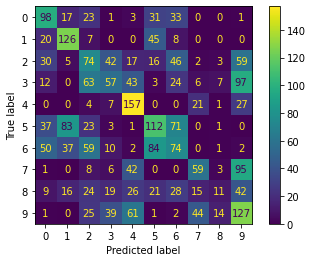

In [6]:
# define baseline model:
# input: X data
# output: GD and DS

# Define callback for early stopping
callback = EarlyStopping(monitor='loss', min_delta=0.005,patience=3)

# Define model - Predict GDDS directly from X, y
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=28, activation='relu'))
    model.add(Dense(18, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
baseline_model = baseline_model()
baseline_model.fit(
   datasets['GDDS']['X']['train'], 
   datasets['GDDS']['y']['train'], 
   validation_data=(
   datasets['GDDS']['X']['val'],
   datasets['GDDS']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = baseline_model.predict(datasets['GDDS']['X']['test'])
evaluate(y_pred, datasets['GDDS']['y']['test'])

Epoch 1/100
503/503 [==============================] - 0s 502us/step - loss: 1.0454 - accuracy: 0.4513 - val_loss: 0.8564 - val_accuracy: 0.5813
Epoch 2/100
503/503 [==============================] - 0s 358us/step - loss: 0.8241 - accuracy: 0.6039 - val_loss: 0.8182 - val_accuracy: 0.6179
Epoch 3/100
503/503 [==============================] - 0s 355us/step - loss: 0.7930 - accuracy: 0.6313 - val_loss: 0.8024 - val_accuracy: 0.6257
Epoch 4/100
503/503 [==============================] - 0s 353us/step - loss: 0.7768 - accuracy: 0.6502 - val_loss: 0.7889 - val_accuracy: 0.6309
Epoch 5/100
503/503 [==============================] - 0s 367us/step - loss: 0.7690 - accuracy: 0.6513 - val_loss: 0.7863 - val_accuracy: 0.6321
Epoch 6/100
503/503 [==============================] - 0s 354us/step - loss: 0.7659 - accuracy: 0.6522 - val_loss: 0.7836 - val_accuracy: 0.6318
Epoch 7/100
503/503 [==============================] - 0s 363us/step - loss: 0.7609 - accuracy: 0.6520 - val_loss: 0.7860 - val_ac

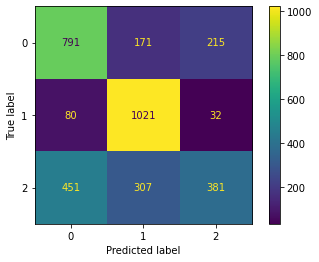

In [7]:
# define GD
def GD_model():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
GD_model = GD_model()
GD_model.fit(
   datasets['GD']['X']['train'], 
   datasets['GD']['y']['train'], 
   validation_data=(
   datasets['GD']['X']['val'],
   datasets['GD']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = GD_model.predict(datasets['GD']['X']['test'])
evaluate(y_pred, datasets['GD']['y']['test'])

Epoch 1/100
460/460 [==============================] - 0s 543us/step - loss: 1.9259 - accuracy: 0.1896 - val_loss: 1.4836 - val_accuracy: 0.3149
Epoch 2/100
460/460 [==============================] - 0s 372us/step - loss: 1.4220 - accuracy: 0.3565 - val_loss: 1.3376 - val_accuracy: 0.4054
Epoch 3/100
460/460 [==============================] - 0s 363us/step - loss: 1.3180 - accuracy: 0.4182 - val_loss: 1.3122 - val_accuracy: 0.4149
Epoch 4/100
460/460 [==============================] - 0s 363us/step - loss: 1.2855 - accuracy: 0.4375 - val_loss: 1.2955 - val_accuracy: 0.4333
Epoch 5/100
460/460 [==============================] - 0s 379us/step - loss: 1.2757 - accuracy: 0.4385 - val_loss: 1.2877 - val_accuracy: 0.4327
Epoch 6/100
460/460 [==============================] - 0s 386us/step - loss: 1.2639 - accuracy: 0.4531 - val_loss: 1.2849 - val_accuracy: 0.4289
Epoch 7/100
460/460 [==============================] - 0s 383us/step - loss: 1.2501 - accuracy: 0.4570 - val_loss: 1.2802 - val_ac

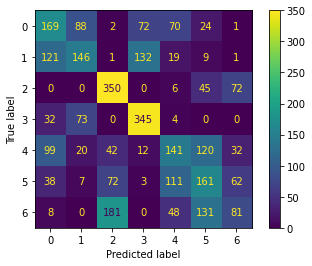

In [8]:
# define disease subclass model
def DS_model():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
DS_model = DS_model()
DS_model.fit(
   datasets['DS']['X']['train'], 
   datasets['DS']['y']['train'], 
   validation_data=(
   datasets['DS']['X']['val'],
   datasets['DS']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = DS_model.predict(datasets['DS']['X']['test'])
evaluate(y_pred, datasets['DS']['y']['test'])

Epoch 1/100
467/467 [==============================] - 0s 527us/step - loss: 1.8594 - accuracy: 0.2638 - val_loss: 1.5556 - val_accuracy: 0.3548
Epoch 2/100
467/467 [==============================] - 0s 390us/step - loss: 1.4768 - accuracy: 0.3720 - val_loss: 1.3834 - val_accuracy: 0.4004
Epoch 3/100
467/467 [==============================] - 0s 370us/step - loss: 1.3469 - accuracy: 0.4120 - val_loss: 1.3480 - val_accuracy: 0.4038
Epoch 4/100
467/467 [==============================] - 0s 369us/step - loss: 1.3194 - accuracy: 0.4183 - val_loss: 1.3394 - val_accuracy: 0.4085
Epoch 5/100
467/467 [==============================] - 0s 379us/step - loss: 1.3123 - accuracy: 0.4249 - val_loss: 1.3320 - val_accuracy: 0.4144
Epoch 6/100
467/467 [==============================] - 0s 372us/step - loss: 1.3003 - accuracy: 0.4342 - val_loss: 1.3313 - val_accuracy: 0.4147
Epoch 7/100
467/467 [==============================] - 0s 372us/step - loss: 1.3002 - accuracy: 0.4219 - val_loss: 1.3283 - val_ac

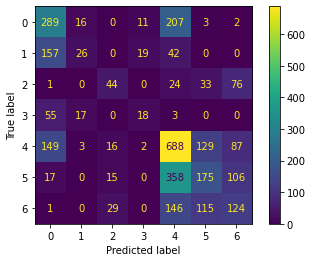

In [9]:
# define disease subclass model 2: with unbalanced data
def DS_model2():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
DS_model2 = DS_model2()
DS_model2.fit(
   datasets['DS_un']['X']['train'], 
   datasets['DS_un']['y']['train'], 
   validation_data=(
   datasets['DS_un']['X']['val'],
   datasets['DS_un']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = DS_model2.predict(datasets['DS_un']['X']['test'])
evaluate(y_pred, datasets['DS_un']['y']['test'])

Epoch 1/100
460/460 [==============================] - 0s 526us/step - loss: 1.8408 - accuracy: 0.2263 - val_loss: 1.0247 - val_accuracy: 0.5838
Epoch 2/100
460/460 [==============================] - 0s 361us/step - loss: 0.8656 - accuracy: 0.6483 - val_loss: 0.7030 - val_accuracy: 0.7140
Epoch 3/100
460/460 [==============================] - 0s 362us/step - loss: 0.6726 - accuracy: 0.7197 - val_loss: 0.6507 - val_accuracy: 0.7298
Epoch 4/100
460/460 [==============================] - 0s 367us/step - loss: 0.6304 - accuracy: 0.7344 - val_loss: 0.6358 - val_accuracy: 0.7368
Epoch 5/100
460/460 [==============================] - 0s 381us/step - loss: 0.6113 - accuracy: 0.7397 - val_loss: 0.6317 - val_accuracy: 0.7324
Epoch 6/100
460/460 [==============================] - 0s 365us/step - loss: 0.6013 - accuracy: 0.7362 - val_loss: 0.6278 - val_accuracy: 0.7302
Epoch 7/100
460/460 [==============================] - 0s 360us/step - loss: 0.6081 - accuracy: 0.7396 - val_loss: 0.6255 - val_ac

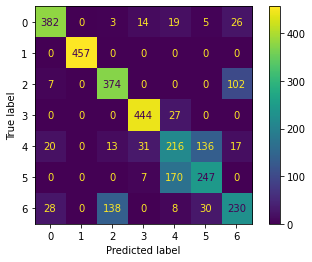

In [10]:
# define disease subclass model 3: balanced and with labels
def DS_model3():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=31, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
DS_model3 = DS_model3()
DS_model3.fit(
   datasets['DS2']['X']['train'], 
   datasets['DS2']['y']['train'], 
   validation_data=(
   datasets['DS2']['X']['val'],
   datasets['DS2']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = DS_model3.predict(datasets['DS2']['X']['test'])
evaluate(y_pred, datasets['DS2']['y']['test'])

Epoch 1/100
383/383 [==============================] - 0s 556us/step - loss: 2.2417 - accuracy: 0.1813 - val_loss: 1.5474 - val_accuracy: 0.4251
Epoch 2/100
383/383 [==============================] - 0s 378us/step - loss: 1.2703 - accuracy: 0.5119 - val_loss: 0.9490 - val_accuracy: 0.5634
Epoch 3/100
383/383 [==============================] - 0s 368us/step - loss: 0.9186 - accuracy: 0.5891 - val_loss: 0.8797 - val_accuracy: 0.5844
Epoch 4/100
383/383 [==============================] - 0s 375us/step - loss: 0.8778 - accuracy: 0.6009 - val_loss: 0.8652 - val_accuracy: 0.5947
Epoch 5/100
383/383 [==============================] - 0s 364us/step - loss: 0.8550 - accuracy: 0.6148 - val_loss: 0.8575 - val_accuracy: 0.6156
Epoch 6/100
383/383 [==============================] - 0s 411us/step - loss: 0.8462 - accuracy: 0.6308 - val_loss: 0.8512 - val_accuracy: 0.6118
Epoch 7/100
383/383 [==============================] - 0s 378us/step - loss: 0.8407 - accuracy: 0.6269 - val_loss: 0.8457 - val_ac

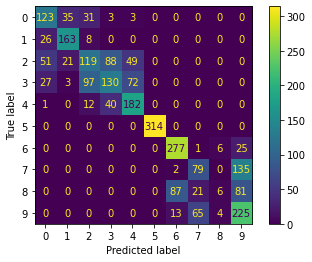

In [11]:
# define disease subclass model 3: balanced and with labels
def GDDS_model():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=31, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
GDDS_model = GDDS_model()
GDDS_model.fit(
   datasets['GDDS2']['X']['train'], 
   datasets['GDDS2']['y']['train'], 
   validation_data=(
   datasets['GDDS2']['X']['val'],
   datasets['GDDS2']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = GDDS_model.predict(datasets['GDDS2']['X']['test'])
evaluate(y_pred, datasets['GDDS2']['y']['test'])

Accuracy: 0.3611551888289432
              precision    recall  f1-score   support

           0       0.39      0.27      0.32       449
           1       0.33      0.81      0.47       457
           2       0.67      0.37      0.48       483
           3       0.10      0.00      0.01       471
           4       0.33      0.43      0.37       433
           5       0.35      0.12      0.17       424
           6       0.31      0.53      0.39       434

    accuracy                           0.36      3151
   macro avg       0.35      0.36      0.32      3151
weighted avg       0.36      0.36      0.32      3151



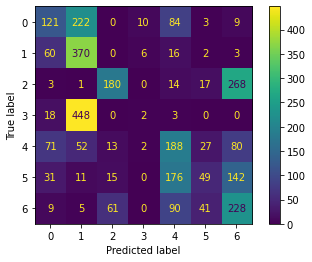

In [12]:
# Combine GD model and DS2 Model to predict subclass
GD_pred = GD_model.predict(datasets['DS2']['X']['test'].iloc[:,:28])
X_pred = datasets['DS2']['X']['test'].iloc[:,:28].reset_index(drop=True).join(pd.DataFrame(GD_pred))
y_pred = DS_model3.predict(X_pred)
evaluate(y_pred, datasets['DS2']['y']['test'])

Accuracy: 0.29295238095238096
              precision    recall  f1-score   support

           0       0.11      0.02      0.03       195
           1       0.04      0.02      0.03       197
           2       0.34      0.27      0.30       328
           3       0.25      0.28      0.26       329
           4       0.45      0.27      0.34       235
           5       0.31      0.80      0.45       314
           6       0.32      0.20      0.25       309
           7       0.33      0.46      0.39       216
           8       0.12      0.05      0.07       195
           9       0.28      0.31      0.30       307

    accuracy                           0.29      2625
   macro avg       0.25      0.27      0.24      2625
weighted avg       0.27      0.29      0.26      2625



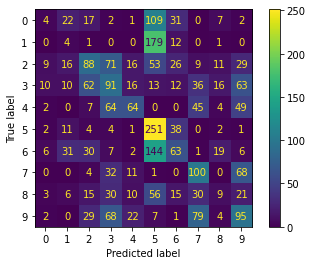

In [13]:
# Combine GD Model and GDDS Model to predict final label
GD_pred = GD_model.predict(datasets['GDDS2']['X']['test'].iloc[:,:28])
X_pred = datasets['GDDS2']['X']['test'].iloc[:,:28].reset_index(drop=True).join(pd.DataFrame(GD_pred))
y_pred = GDDS_model.predict(X_pred)
evaluate(y_pred, datasets['GDDS2']['y']['test'])


In [14]:
GD_pred[3]

array([0.8021217 , 0.00350525, 0.19437309], dtype=float32)

In [15]:
test = datasets['GDDS2']['X']['test'].iloc[:,28:]
test.iloc[3,:]

Mitochondrial genetic inheritance disorders     1
Multifactorial genetic inheritance disorders    0
Single-gene inheritance diseases                0
Name: 6778, dtype: int64

In [17]:
#TODO try not standardizing GD features before training